# Read and operate geographic map data

To make the acquisition of geographic map more convinient, we provide three functions to read map data from online repositories or a local file. The `read_aliyun_map()` retrieves an area or multiple areas of China map from the [DataV.GeoAtlas](http://datav.aliyun.com/portal/school/atlas/area_selector). We just need to access the [DataV.GeoAtlas](http://datav.aliyun.com/portal/school/atlas/area_selector) to query one or multiple adcodes, and then pass them as a parameter to `read_aliyun_map()`. This allows us to obtain a microgeo-compatible and reliable `SpatialPolygonsDataFrame`. The `read_gadm_map()` and `read_shp_map()` is designed to retrieve map data from the [Global Administrative Areas (GADM)](https://gadm.org) and a local ESRI Shapefile, respectively, based on the `geodata::gadm()` and `terra::vect()`. These two functions are are capable of expanding the source of map data. By using these functions, we are able to retrieve a microgeo-compatible `SpatialPolygonsDataFrame` for any area in the world.

Particularly, the `SpatialPolygonsDataFrame` returned by `read_gadm_map()` and `read_shp_map()` should be processed by `trans_map_fmt()`, which converts a non-standardized `SpatialPolygonsDataFrame` to a microgeo-compatible one. Besides, we also implemented a function of `grid_map()`, which grids the map based on a given spatial resolution (degree). That is, the map of the whole study area can be divided into grids uniformly by applying such a function. The `SpatialPolygonsDataFrame` returned by `grid_map()` is the foundation of grid-based analysis and visualization in [microgeo](https://github.com/ChaonanLi/microgeo) R package.

Here we need three R packages for this section of [microgeo](https://github.com/ChaonanLi/microgeo) R package tutorial. Just run the following codes to import them into R environment.

In [1]:
suppressMessages(require("magrittr")) 
require("ggplot2")  %>% suppressMessages()
require("microgeo") %>% suppressMessages()

If the Chinese characters cannot be displayed correctly, please run the following codes to set locale to `UTF-8`:

In [2]:
prev_locale <- Sys.setlocale("LC_CTYPE", "C.UTF-8") 

Now, let's go through each of these functions and see how they are used. 

## 1. Read map data from the [DataV.GeoAtlas](http://datav.aliyun.com/portal/school/atlas/area_selector)

The [DataV.GeoAtlas](http://datav.aliyun.com/portal/school/atlas/area_selector) (Aliyun, 阿里云) provides standardized and reliable map data of China. We designed a function of `read_aliyun_map()` for Chinese users to retrieve trustworthy map data from such a public repository. This function requires one or mutiple adcodes to download the map of our study area. For example, the `650000` represents Xinjiang, while the `c(540000, 630000, 510000)` represents Xizang, Qinghai and Sichuan, respectively. We can use the [DataV.GeoAtlas](http://datav.aliyun.com/portal/school/atlas/area_selector) to query the adcodes for map areas. Here are some simple examples.

In [3]:
# Read the map of Xizang, Qinghai and Sichuan
# The `read_aliyun_map()` returns a microgeo-compatible and reliable SpatialPolygonsDataFrame
# There are Chinese characters in the `SpatialPolygonsDataFrame` returned by `read_aliyun_map()`
map2 <- read_aliyun_map(adcode = c(540000, 630000, 510000)) %>% suppressMessages()
head(map2@data)

,TYPE,FMTS,NAME,X.CENTER,Y.CENTER
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,DataV.GeoAtlas,microgeo,西藏自治区,88.38828,31.56375
2,DataV.GeoAtlas,microgeo,青海省,96.04353,35.72640
3,DataV.GeoAtlas,microgeo,四川省,102.69345,30.67454


In [4]:
# change the `NAME` to Pinyin if you plan to publish the map on an international journal
map2@data$NAME <- c("Tibet", "Qinghai", "Sichuan")
head(map2@data)

,TYPE,FMTS,NAME,X.CENTER,Y.CENTER
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,DataV.GeoAtlas,microgeo,Tibet,88.38828,31.56375
2,DataV.GeoAtlas,microgeo,Qinghai,96.04353,35.72640
3,DataV.GeoAtlas,microgeo,Sichuan,102.69345,30.67454


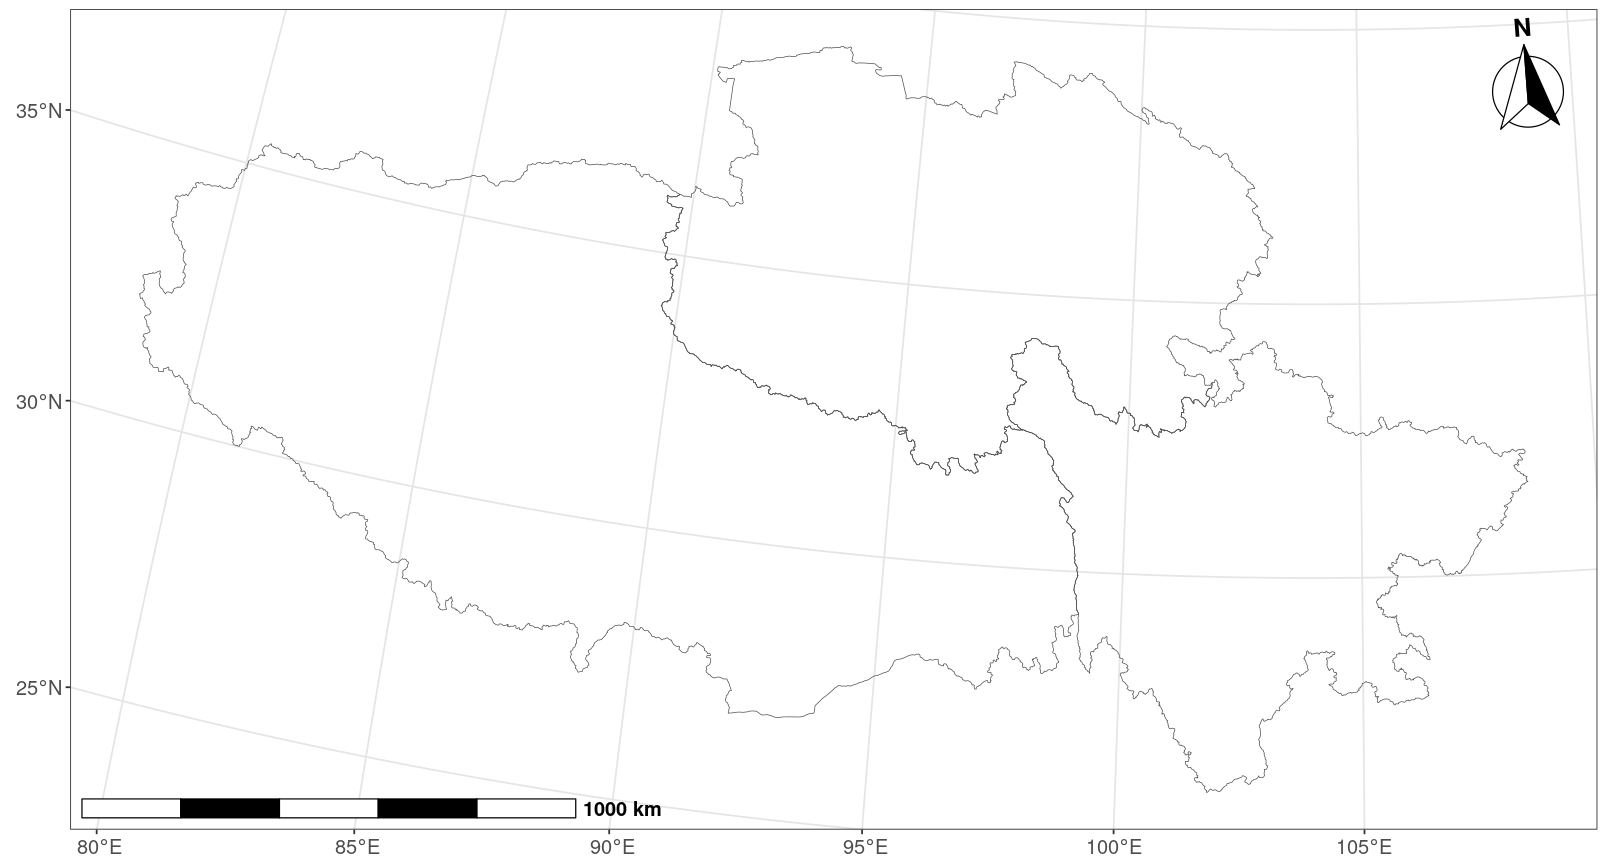

In [5]:
# Plot the map of Xizang, Qinghai and Sichuan
options(repr.plot.width = 13.43, repr.plot.height = 7.23)
map2 %>% plot_bmap() %>% add_north_arrow() %>% add_scale_bar() %>% add_crs()

## 2. Read map data from the [Global Administrative Areas (GADM)](https://gadm.org)

To expand the source of map data, we also desinged a function of `read_gadm_map()` based on the `geodata::gadm()`, which reads map data from the [GADM](https://gadm.org/) for any area in the world. **Particularly, the Chinese territorial claims are not reflected in the boundary data provided by the GADM, and the data for provincial/city/district boundaries may not necessarily be the most up-to-date versions. Thus, additional cautions should be exercised when publishing graphics that utilize GADM data in official publications. The author of [microgeo](https://github.com/ChaonanLi/microgeo) R package is not responsible for any political disputes and instability caused by the use of this R package by anyone**. The `SpatialPolygonsDataFrame` returned by `read_gadm_map()` should be processed by `trans_map_fmt()` to convert the non-standardized `SpatialPolygonsDataFrame` to a microgeo-compatible one.

Firstly, we use the map of Australia as an example. Just run the following codes.

In [6]:
# Read the map of Australia
map <- read_gadm_map(iso = 'Australia', out.dir = 'test') 
head(map@data)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AUS,Australia,AUS.1_1,Ashmore and Cartier Islands,NA,NA,Territory,Territory,12,AU.AS
2,AUS,Australia,AUS.2_1,Australian Capital Territory,NA,NA,Territory,Territory,8,AU.AC
3,AUS,Australia,AUS.3_1,Coral Sea Islands Territory,NA,NA,Territory,Territory,11,AU.CR
4,AUS,Australia,AUS.4_1,Jervis Bay Territory,NA,NA,Territory,Territory,10,AU.JB
5,AUS,Australia,AUS.5_1,New South Wales,NA,NA,State,State,1,AU.NS
6,AUS,Australia,AUS.6_1,Northern Territory,NA,NA,Territory,Territory,7,AU.NT


In [7]:
# Convert the non-standardized `SpatialPolygonsDataFrame` to a microgeo-compatible one
map %<>% trans_map_fmt(var = 'NAME_1')
head(map@data)

,TYPE,FMTS,NAME,X.CENTER,Y.CENTER
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Non.DataV.GeoAtlas,microgeo,Ashmore and Cartier Islands,123.1045,-12.26562
2,Non.DataV.GeoAtlas,microgeo,Australian Capital Territory,149.0025,-35.48881
3,Non.DataV.GeoAtlas,microgeo,Coral Sea Islands Territory,154.3975,-20.99987
4,Non.DataV.GeoAtlas,microgeo,Jervis Bay Territory,150.6897,-35.15280
5,Non.DataV.GeoAtlas,microgeo,New South Wales,147.0143,-32.17578
6,Non.DataV.GeoAtlas,microgeo,Northern Territory,133.3700,-19.47888


Scale on map varies by more than 10%, scale bar may be inaccurate



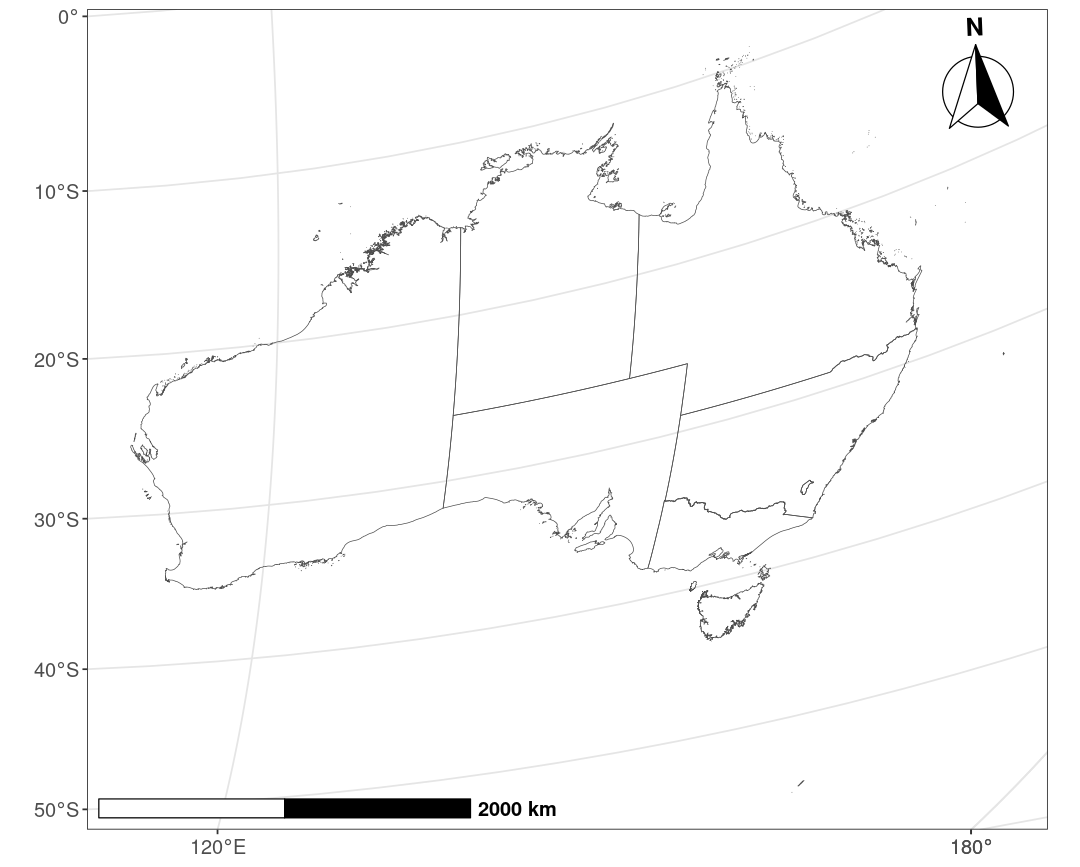

In [8]:
# Visualize the map of Australia
options(repr.plot.width = 9, repr.plot.height = 7.23)
map %>% plot_bmap() %>% add_north_arrow() %>% add_scale_bar() %>% add_crs()

Then, we use the map of Washington State, USA as an example. Just run the following codes.

In [9]:
# Read the map of Washington State, USA
map <- read_gadm_map(iso = 'USA', out.dir = 'test')
head(map@data)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,USA,United States,USA.1_1,Alabama,AL|Ala.,NA,State,State,NA,US.AL
2,USA,United States,USA.2_1,Alaska,AK|Alaska,NA,State,State,NA,US.AK
3,USA,United States,USA.3_1,Arizona,AZ|Ariz.,NA,State,State,NA,US.AZ
4,USA,United States,USA.4_1,Arkansas,AR|Ark.,NA,State,State,NA,US.AR
5,USA,United States,USA.5_1,California,CA|Calif.,NA,State,State,NA,US.CA
6,USA,United States,USA.6_1,Colorado,CO|Colo.,NA,State,State,NA,US.CO


In [10]:
# Get the areas of Washington, USA
map %<>% terra::subset(map$NAME_1 == 'Washington')
head(map@data)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
48,USA,United States,USA.48_1,Washington,WA|Wash.,NA,State,State,NA,US.WA


In [11]:
# Convert the non-standardized `SpatialPolygonsDataFrame` to a microgeo-compatible one
map %<>% trans_map_fmt(var = 'NAME_1') # only use the map of Washington, USA
head(map@data)

,TYPE,FMTS,NAME,X.CENTER,Y.CENTER
,<chr>,<chr>,<chr>,<dbl>,<dbl>
48,Non.DataV.GeoAtlas,microgeo,Washington,-120.4222,47.37641


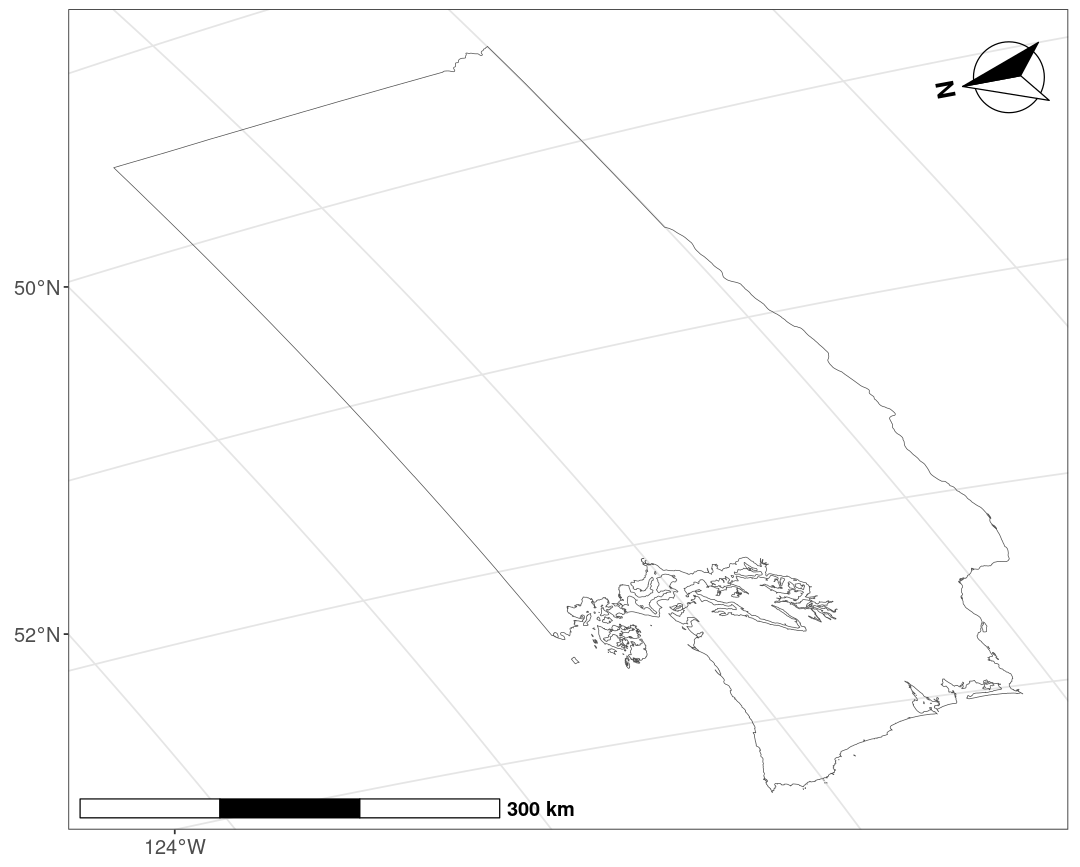

In [12]:
# Visualize the map of Washington State, USA
options(repr.plot.width = 9, repr.plot.height = 7.23)
map %>% plot_bmap() %>% add_north_arrow() %>% add_scale_bar() %>% add_crs()

## 3. Read map data from a ESRI Shapefile

If neither the `read_aliyun_map()` nor the `read_gadm_map()` meets your needs, there is another way to read map data for using the [microgeo](https://github.com/ChaonanLi/microgeo) R package. We designed a function of `read_shp_map()` based on the `terra::vect()`, which reads a ESRI Shapefile from your local computer disk (the ESRI Shapefile must be provided by yourself). The `SpatialPolygonsDataFrame` returned by `read_shp_map()` should be processed by `trans_map_fmt()` to convert the non-standardized `SpatialPolygonsDataFrame` to a microgeo-compatible one.

Firstly, we use the sub-areas of China map loaded from a local ESRI Shapefile as an example. 

In [13]:
# Read original China map from local shapefiles
cn.map <- system.file("shapefiles/china-map", "china.shp", package = "microgeo") %>% read_shp_map() %>% suppressMessages() 
head(cn.map@data)

,AREA,BOUND_A_,BOUND_A_ID,FCNAME,FENAME,NAME,OWNER,PERIMETER,SOC
,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,54.4821,6,5,黑龙江省,Heilongjiang Sheng,NA,黑龙江省,70.1328,CHN
2,129.0670,7,6,内蒙古自治区,Neimongol Zizhiqu,NA,内蒙古自治区,133.9940,CHN
3,175.0860,23,26,新疆维吾尔自治区,Xinjianguygur Zizhiqu,NA,新疆维吾尔自治区,86.0871,CHN
4,21.3066,54,59,吉林省,Jilin Sheng,NA,吉林省,43.2982,CHN
5,15.5891,107,122,辽宁省,Liaoning Sheng,NA,辽宁省,40.6203,CHN
6,43.6061,124,140,甘肃省,Gansu Sheng,NA,甘肃省,81.9243,CHN


In [14]:
# Get the areas of Xizang, Qinghai and Sichuan
cn.map.sub <- terra::subset(cn.map, cn.map$FENAME %in% c("Xizang Zizhiqu", "Qinghai Sheng", "Sichuan Sheng")) 
head(cn.map.sub@data)

,AREA,BOUND_A_,BOUND_A_ID,FCNAME,FENAME,NAME,OWNER,PERIMETER,SOC
,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
93,69.3981,412,418,青海省,Qinghai Sheng,NA,青海省,63.5516,CHN
221,114.2030,725,721,西藏自治区,Xizang Zizhiqu,NA,西藏自治区,78.2912,CHN
266,45.7347,1144,1138,四川省,Sichuan Sheng,NA,四川省,60.2137,CHN


In [15]:
# Convert the non-standardized `SpatialPolygonsDataFrame` to a microgeo-compatible one
cn.map.sub %<>% trans_map_fmt(var = 'FENAME')
head(cn.map.sub@data)

,TYPE,FMTS,NAME,X.CENTER,Y.CENTER
,<chr>,<chr>,<chr>,<dbl>,<dbl>
93,Non.DataV.GeoAtlas,microgeo,Qinghai Sheng,96.03758,35.67091
221,Non.DataV.GeoAtlas,microgeo,Xizang Zizhiqu,88.44232,31.49123
266,Non.DataV.GeoAtlas,microgeo,Sichuan Sheng,102.69251,30.62964


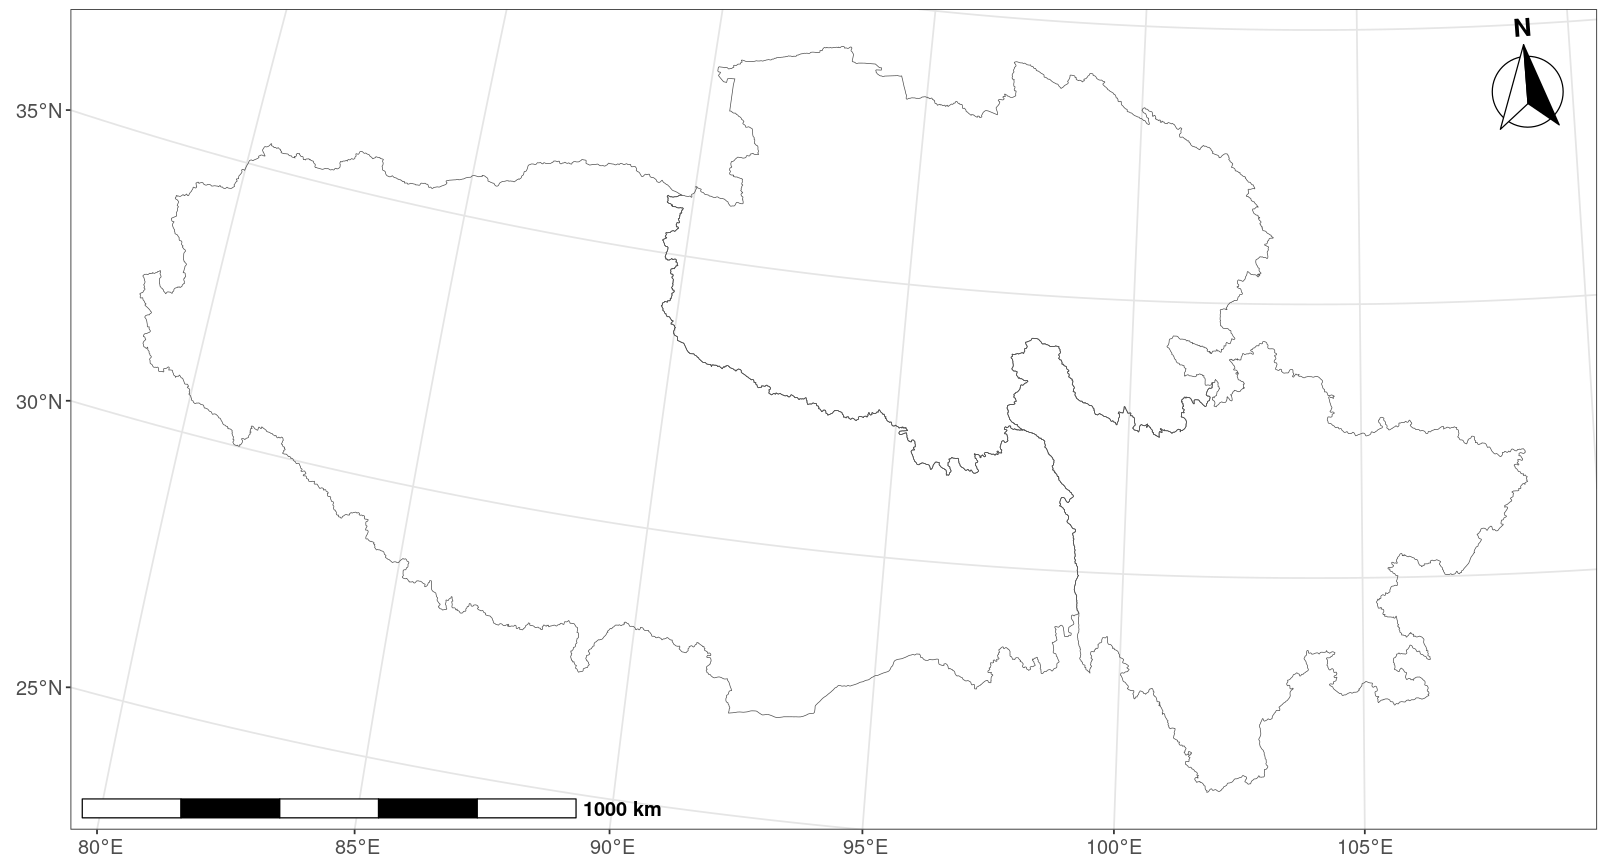

In [16]:
# Plot the map of Xizang, Qinghai and Sichuan
options(repr.plot.width = 13.43, repr.plot.height = 7.23)
cn.map.sub %>% plot_bmap() %>% add_north_arrow() %>% add_scale_bar() %>% add_crs()

Then, we use the map data of Qinghai-Tibet Plateau loaded from a local ESRI Shapefile as an example. 

In [17]:
# Read the original map of Qinghai-Tibet Plateau (QTP)
qtp.map <- system.file("shapefiles/qtp-map", "DBATP_Polygon.shp", package = "microgeo") %>% read_shp_map() 
head(qtp.map@data)

,Area
,<dbl>
1,2542298


In [18]:
# Add a column to meet the demands of `trans_map_fmt() ` function
qtp.map@data$NAME <- "Qinghai-Tibet Plateau"
head(qtp.map@data)

,Area,NAME
,<dbl>,<chr>
1,2542298,Qinghai-Tibet Plateau


In [19]:
# Convert the non-standardized `SpatialPolygonsDataFrame` to a microgeo-compatible one
qtp.map %<>% trans_map_fmt(var = 'NAME')
head(qtp.map@data) 

,TYPE,FMTS,NAME,X.CENTER,Y.CENTER
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Non.DataV.GeoAtlas,microgeo,Qinghai-Tibet Plateau,91.56316,33.54207


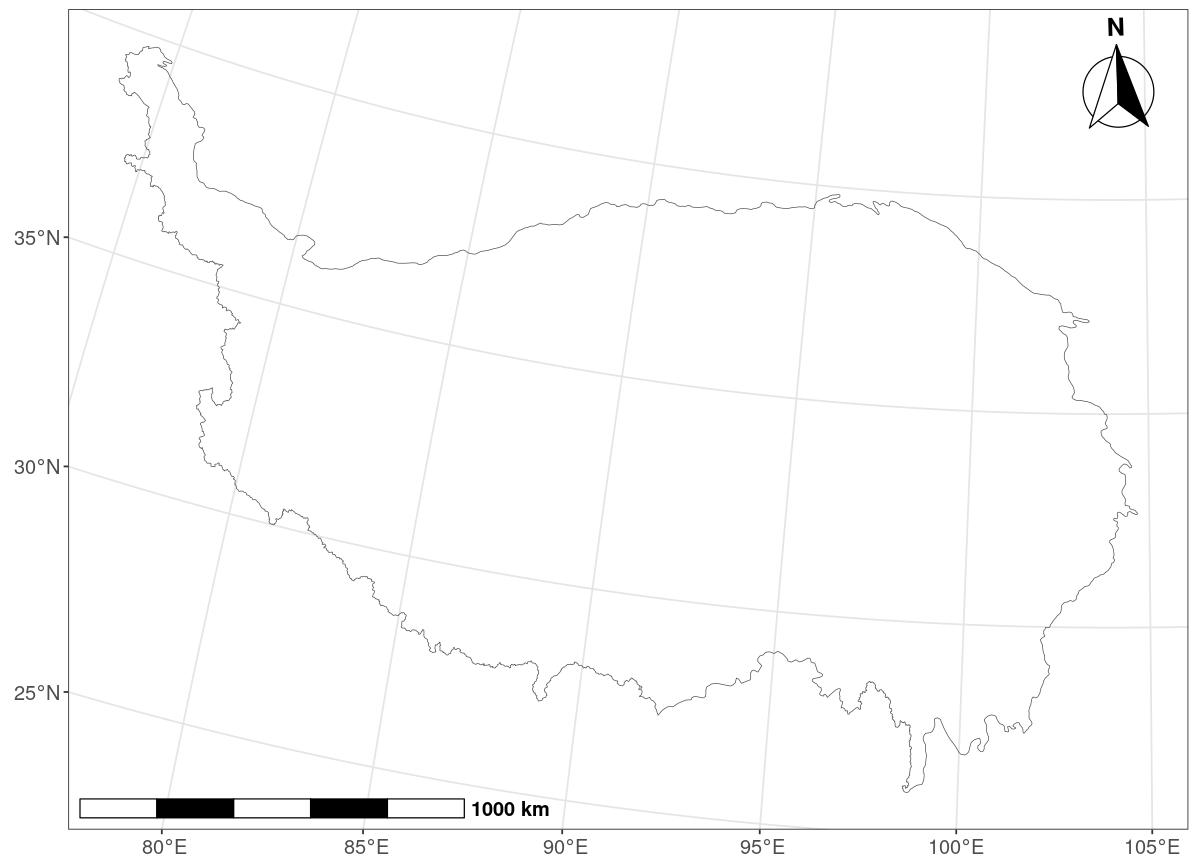

In [20]:
# Plot the map of Qinghai-Tibet Plateau
options(repr.plot.width = 10, repr.plot.height = 7.23)
qtp.map %>% plot_bmap() %>% add_north_arrow() %>% add_scale_bar() %>% add_crs()

## 4. Format the SpatialPolygonsDataFrame

Since there are a wide variety of contents in the `SpatialPolygonsDataFrame` retruned by `read_gadm_map()` and `read_shp_map()`, especially the `read_shp_map()`, we designed a function of `trans_map_fmt()` to convert a non-standardized `SpatialPolygonsDataFrame` to a microgeo-compatible one. Please note that this function ***CAN NOT*** accept the `SpatialPolygonsDataFrame` returned by `read_aliyun_map()`, which is already a microgeo-compatible one. The `trans_map_fmt()` requires a character that can indicate the name of each polygon in the formatted `SpatialPolygonsDataFrame`. We can use this function to convert any `SpatialPolygonsDataFrame` to a microgeo-compatible one, not limited to that generated by `read_gadm_map()` and `read_shp_map()`.

Actually, we have already applied the function of `trans_map_fmt()` in the above sections, so here we just provide a very simple example.

In [21]:
# Read the map areas from local shapefiles
cn.map <- system.file("shapefiles/china-map", "china.shp", package = "microgeo") %>% read_shp_map() 
cn.map.sub <- terra::subset(cn.map, cn.map$FENAME %in% c("Xizang Zizhiqu", "Qinghai Sheng", "Sichuan Sheng")) 
head(cn.map.sub@data)

,AREA,BOUND_A_,BOUND_A_ID,FCNAME,FENAME,NAME,OWNER,PERIMETER,SOC
,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
93,69.3981,412,418,青海省,Qinghai Sheng,NA,青海省,63.5516,CHN
221,114.2030,725,721,西藏自治区,Xizang Zizhiqu,NA,西藏自治区,78.2912,CHN
266,45.7347,1144,1138,四川省,Sichuan Sheng,NA,四川省,60.2137,CHN


In [22]:
# Convert the format of SpatialPolygonsDataFrame
cn.map.sub %<>% trans_map_fmt(var = 'FENAME')
head(cn.map.sub@data)

,TYPE,FMTS,NAME,X.CENTER,Y.CENTER
,<chr>,<chr>,<chr>,<dbl>,<dbl>
93,Non.DataV.GeoAtlas,microgeo,Qinghai Sheng,96.03758,35.67091
221,Non.DataV.GeoAtlas,microgeo,Xizang Zizhiqu,88.44232,31.49123
266,Non.DataV.GeoAtlas,microgeo,Sichuan Sheng,102.69251,30.62964


## 5. Add grids to a SpatialPolygonsDataFrame

In some case, it is very unreliable to use the naive polygons (e.g., administrative divisions) in analyzing the biogeographic patterns of microbial traits. For example, the samples are unevenly distributed within the study area or are not collected based on a grid sampling method. To solve such a problem, we designed a function of `grid_map()`, which can grid the study areas based on a given spatial resolution (degree). That is, the map of the whole study area can be divided into grids uniformly by using this function. The `SpatialPolygonsDataFrame` returned by the function of `grid_map()` can be used for subsequently grid-based statistical analysis and visualization.

In [23]:
# Read map from the DataV.GeoAtlas (`http://datav.aliyun.com/portal/school/atlas/area_selector`)
map <- read_aliyun_map(adcode = c("540000", "630000", "510000"))
head(map@data)

,TYPE,FMTS,NAME,X.CENTER,Y.CENTER
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,DataV.GeoAtlas,microgeo,西藏自治区,88.38828,31.56375
2,DataV.GeoAtlas,microgeo,青海省,96.04353,35.72640
3,DataV.GeoAtlas,microgeo,四川省,102.69345,30.67454


In [24]:
# Grid the map using a spatial resolution of 1.5 degree
gridded.map <- grid_map(map = map, res = 1.5) %>% suppressMessages()
head(gridded.map@data)

,TYPE,FMTS,NAME,X.CENTER,Y.CENTER
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Gridded.Map,microgeo,1,83.74702,29.73742
2,Gridded.Map,microgeo,2,85.46302,28.50944
3,Gridded.Map,microgeo,3,86.67299,28.33105
4,Gridded.Map,microgeo,4,89.49169,28.25211
5,Gridded.Map,microgeo,5,88.12468,28.29693
6,Gridded.Map,microgeo,6,85.14919,29.46224


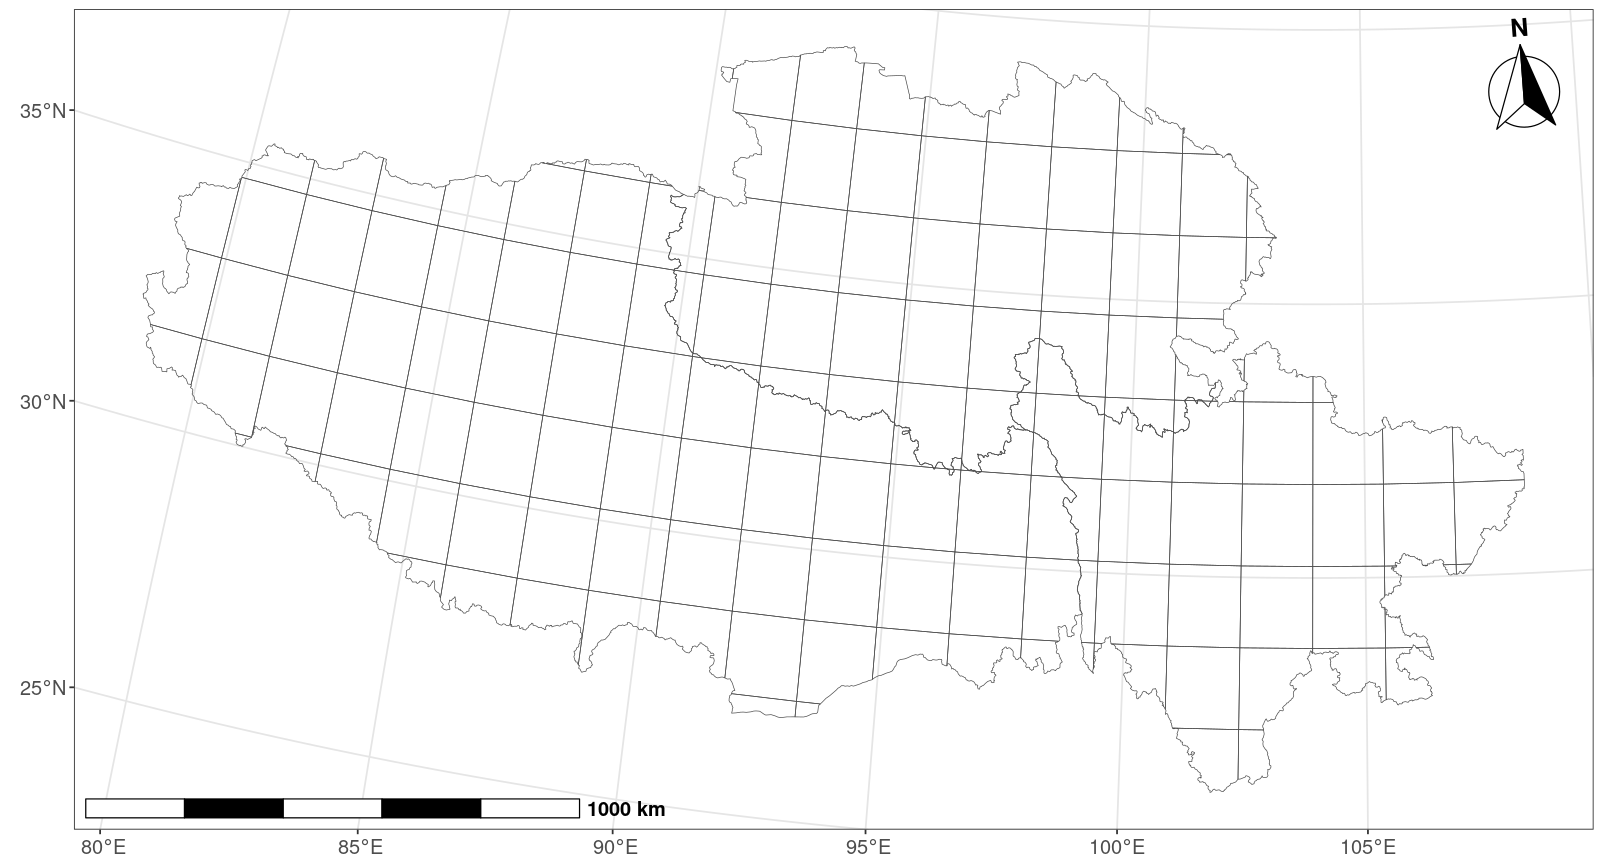

In [25]:
# Plot the gridded map without grid names
options(repr.plot.width = 13.43, repr.plot.height = 7.23)
gridded.map %>% plot_bmap() %>% add_north_arrow() %>% add_scale_bar() %>% add_crs()

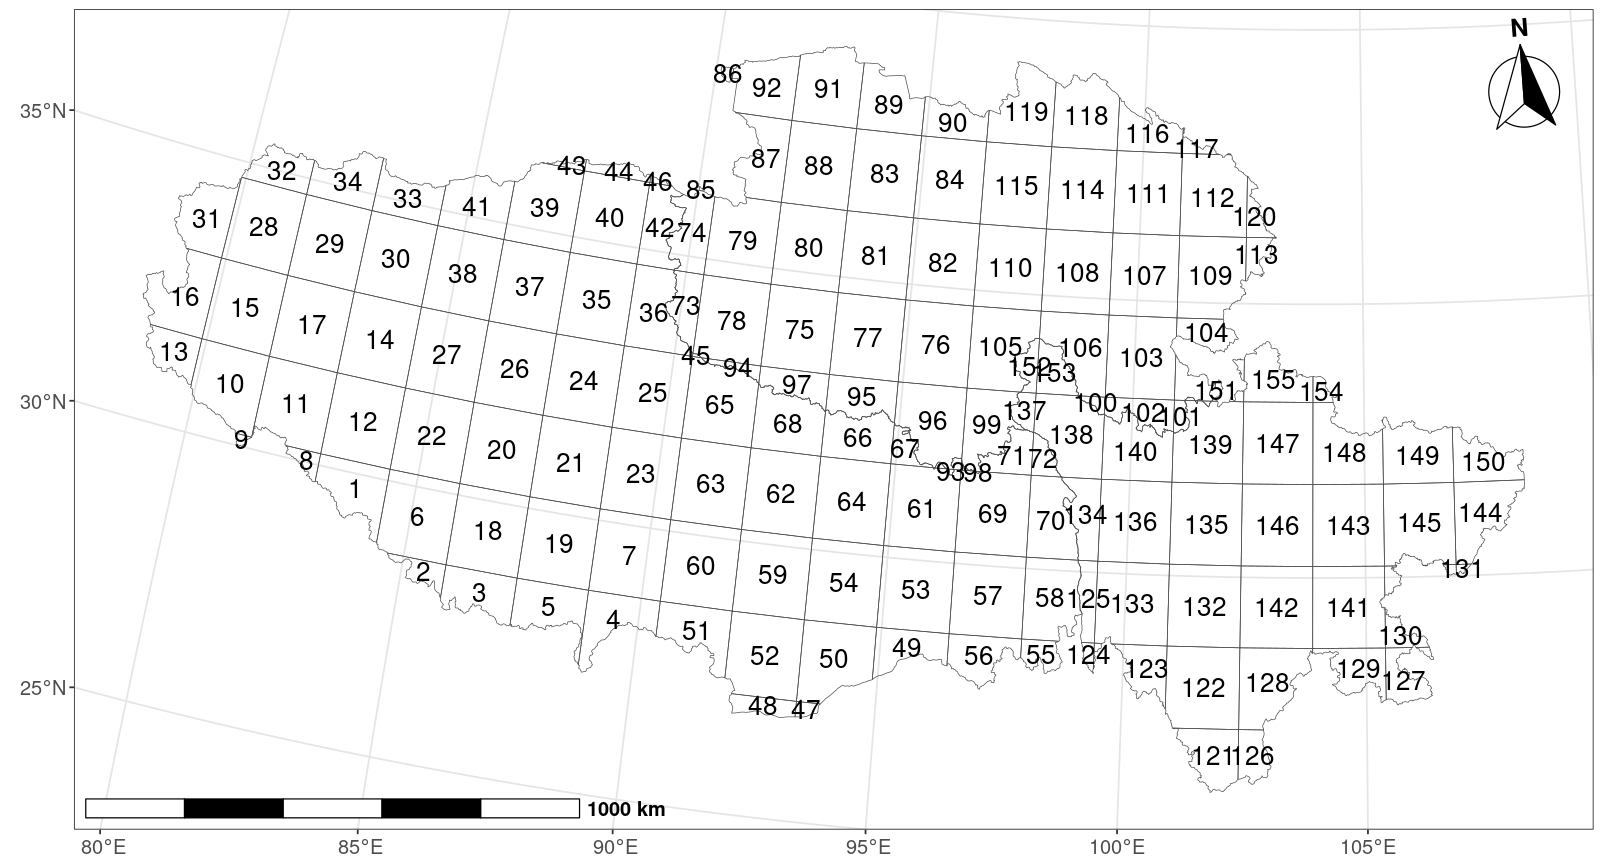

In [26]:
# Plot the gridded map with grid names
options(repr.plot.width = 13.43, repr.plot.height = 7.23)
gridded.map %>% plot_bmap() %>% 
    add_label(dat = gridded.map@data, lab.var = "NAME", lon.var = "X.CENTER", lat.var = "Y.CENTER", size = 5.5) %>% 
    add_north_arrow() %>% add_scale_bar() %>% add_crs()